<a href="https://colab.research.google.com/github/alirezakdph/clustering-algorithms/blob/main/HW4_AlirezaKhodapanah_403443203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1

### K-Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.method = np.mean

    def fit(self, X):
        n_samples, n_features = X.shape

        np.random.seed(42)
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            clusters = [[] for _ in range(self.n_clusters)]
            for point in X:
                distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
                cluster_index = np.argmin(distances)
                clusters[cluster_index].append(point)

            old_centroids = self.centroids.copy()

            for idx, cluster in enumerate(clusters):
                if cluster:
                    self.centroids[idx] = self.method(cluster, axis=0)


            converged = True
            for old, new in zip(old_centroids, self.centroids):
                if euclidean_distance(old, new) > self.tol:
                    converged = False
                    break

            if converged:
                break


        self.labels_ = np.zeros(n_samples, dtype=int)
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            self.labels_[i] = np.argmin(distances)

    def predict(self, X):
        labels = []
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("centroids:")
print(kmeans.centroids)

print("\n lables:")
print(kmeans.labels_)


centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

 lables:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

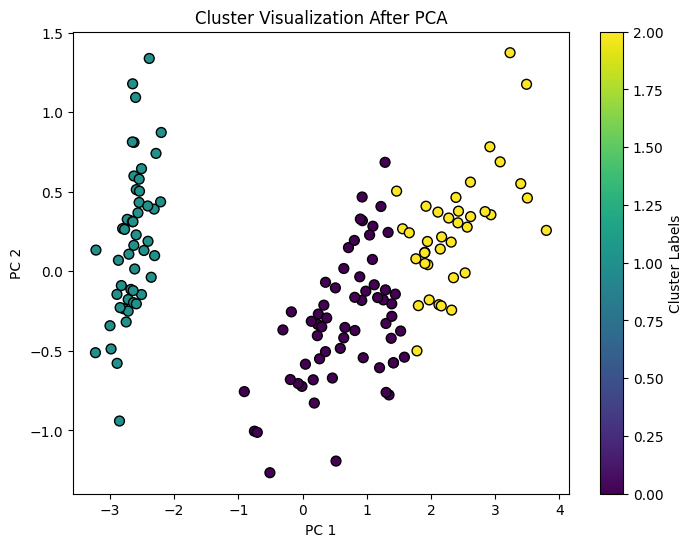

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization After PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Labels')
plt.show()

### K-Means++

In [ ]:
def kmeans_plus_plus_initialization(X, n_clusters):
    np.random.seed(42)
    centroids = [X[np.random.choice(len(X))]]

    for _ in range(1, n_clusters):
        distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probabilities = probabilities.cumsum()
        r = np.random.rand()
        next_index = np.where(cumulative_probabilities >= r)[0][0]
        centroids.append(X[next_index])
    return np.array(centroids)

class KMeansPlusPlus(KMeans):
    def fit(self, X):
        self.centroids = kmeans_plus_plus_initialization(X, self.n_clusters)
        super().fit(X)

In [ ]:
kmeans_pp = KMeansPlusPlus(n_clusters=3)
kmeans_pp.fit(X)

print("centroids:")
print(kmeans_pp.centroids)

print("\n labels:")
print(kmeans_pp.labels_)

centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

 labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


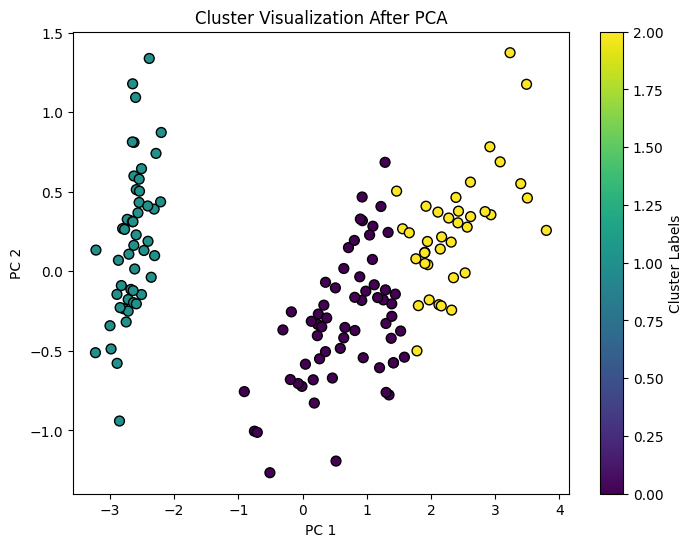

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pp.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization After PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Labels')
plt.show()

### K-Medians

In [ ]:
class KMedians(KMeans):
    def fit(self, X):
        self.method = np.median
        super().fit(X)

In [ ]:
kmedians = KMedians(n_clusters=3)
kmedians.fit(X)

print("centroids:")
print(kmedians.centroids)

print("\n labels:")
print(kmedians.labels_)

centroids:
[[5.9 2.8 4.5 1.4]
 [5.  3.4 1.5 0.2]
 [6.7 3.  5.6 2.1]]

 labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


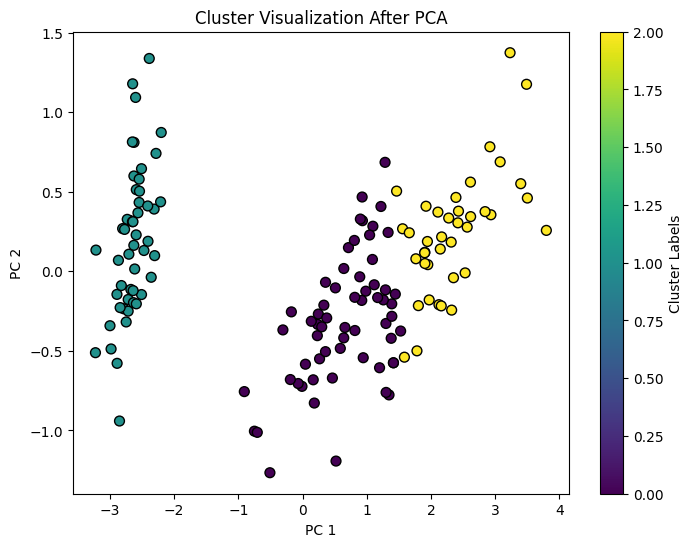

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedians.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization After PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Labels')
plt.show()

### K-Medoids

In [ ]:
class KMedoids:
    def __init__(self, n_clusters, max_iters=10, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.medoids = None
        self.labels_ = None

    def fit(self, X):
        n_samples, n_features = X.shape

        np.random.seed(42)
        medoid_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.medoids = X[medoid_indices]

        for _ in range(self.max_iters):
            labels = np.zeros(n_samples, dtype=int)
            for i, point in enumerate(X):
                distances = [euclidean_distance(point, medoid) for medoid in self.medoids]
                labels[i] = np.argmin(distances)

            new_medoids = []
            for i in range(self.n_clusters):
                cluster_points = X[labels == i]
                min_distance = float('inf')
                best_medoid = None
                for x in cluster_points:
                    total_distance = sum(euclidean_distance(x, point) for point in cluster_points)
                    if total_distance < min_distance:
                        min_distance = total_distance
                        best_medoid = x
                new_medoids.append(best_medoid)


            converged = True
            for old, new in zip(self.medoids, new_medoids):
                if euclidean_distance(old, new) > self.tol:
                    converged = False
                    break

            if converged:
                break

            self.medoids = np.array(new_medoids)

        self.labels_ = labels

    def predict(self, X):
        labels = []
        for point in X:
            distances = [euclidean_distance(point, medoid) for medoid in self.medoids]
            labels.append(np.argmin(distances))
        return np.array(labels)


In [ ]:
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X)

print("medoids:")
print(kmedoids.medoids)

print("\n labels:")
print(kmedoids.labels_)

medoids:
[[6.  2.9 4.5 1.5]
 [5.  3.4 1.5 0.2]
 [6.8 3.  5.5 2.1]]

 labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


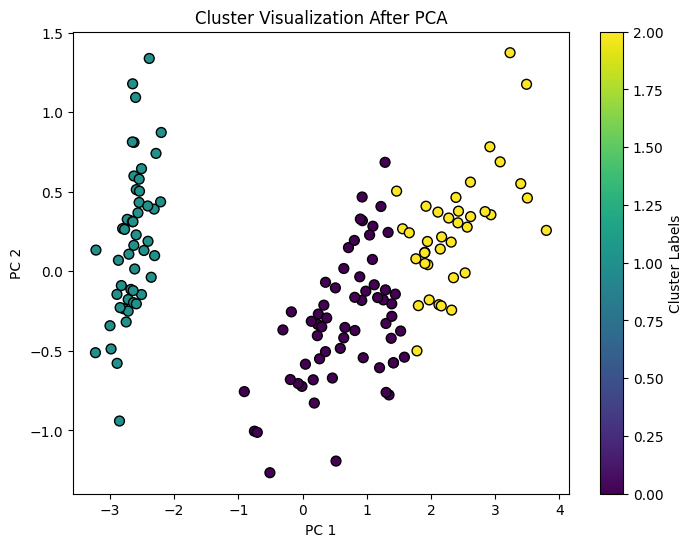

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization After PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Labels')
plt.show()

#Q2

##DBSCAN

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, feature1, feature2, labels, title=None):
    plt.figure(figsize=(8, 4))
    plt.scatter(X[:, feature1], X[:,  feature2], c=labels, cmap="viridis", s=50)
    plt.xlabel("feature %d" %feature1)
    plt.ylabel("feature %d" %feature2)
    if title:
        plt.title(title)
    else:
        plt.title('DBSCAN (feature %d and feature %d)'%(feature1, feature2))
    plt.show()

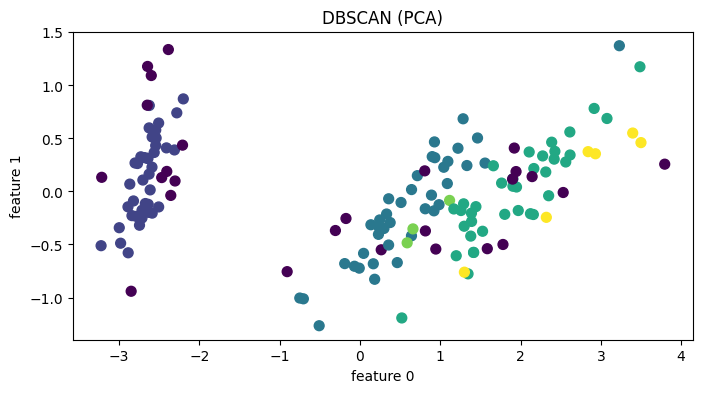

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler
import numpy as np

iris = load_iris()
X_iris = iris.data
X_iris = Normalizer().fit_transform(X_iris)  # Normalize the data


dbscan_iris = DBSCAN(eps=0.025, min_samples=3)
labels_iris = dbscan_iris.fit_predict(X_iris)


pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X)
plot_clusters(iris_pca, 0, 1, labels_iris, "DBSCAN (PCA)")


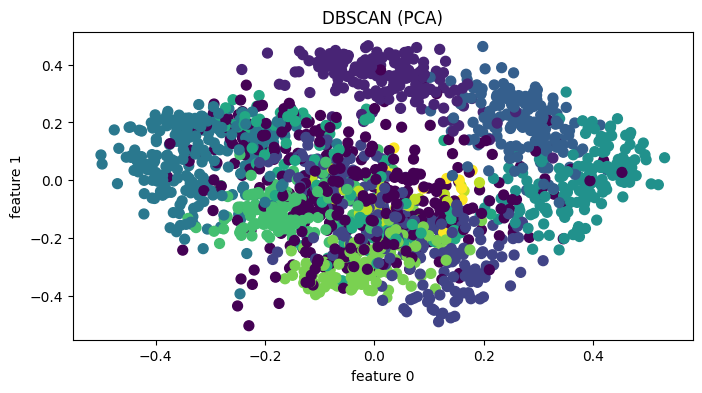

Number of clusters found in digits dataset: 10
Noise points in digits dataset: 369


In [ ]:
digits = load_digits()
X_digits = digits.data
y = digits.target
X_digits = Normalizer().fit_transform(X_digits)

dbscan_digits = DBSCAN(eps=0.35, min_samples=10)
labels_digits = dbscan_digits.fit_predict(X_digits)

pca = PCA(n_components=3)
digits_pca = pca.fit_transform(X_digits)

plot_clusters(digits_pca, 0, 1, labels_digits, "DBSCAN (PCA)")

unique_clusters = len(set(labels_digits)) - (1 if -1 in labels_digits else 0)
print("Number of clusters found in digits dataset:", unique_clusters)
print("Noise points in digits dataset:", list(labels_digits).count(-1))


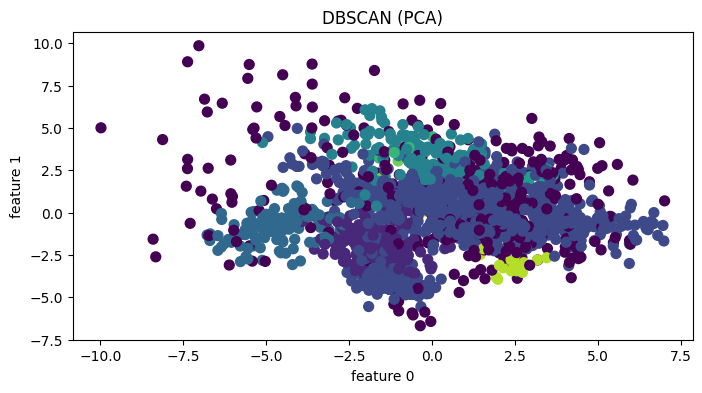

Number of clusters found in digits dataset: 9
Noise points in digits dataset: 366


In [ ]:
digits = load_digits()
X_digits = digits.data
y = digits.target
X_digits = StandardScaler().fit_transform(X_digits)

dbscan_digits = DBSCAN(eps=4.7, min_samples=7)
labels_digits = dbscan_digits.fit_predict(X_digits)

pca = PCA(n_components=3)
digits_pca = pca.fit_transform(X_digits)

plot_clusters(digits_pca, 0, 1, labels_digits, "DBSCAN (PCA)")

unique_clusters = len(set(labels_digits)) - (1 if -1 in labels_digits else 0)
print("Number of clusters found in digits dataset:", unique_clusters)
print("Noise points in digits dataset:", list(labels_digits).count(-1))


##different metrics

### euclidean

Metric: euclidean, Number of clusters: 9, Noise points: 366


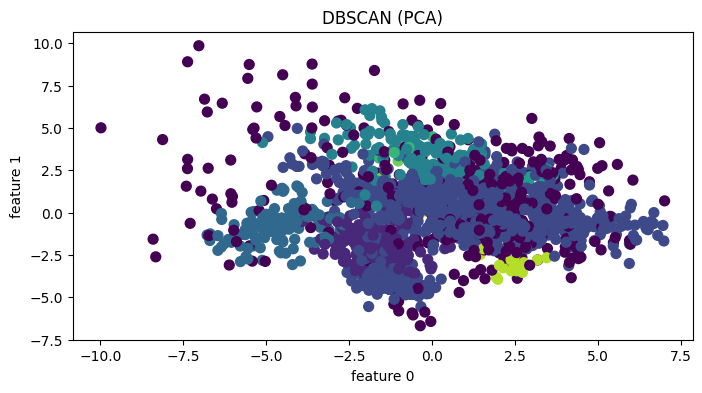

In [ ]:
metric = 'euclidean'

dbscan_metric = DBSCAN(eps=4.7, min_samples=7, metric=metric)
labels_metric = dbscan_metric.fit_predict(X_digits)
unique_clusters = len(set(labels_metric)) - (1 if -1 in labels_metric else 0)
print(f"Metric: {metric}, Number of clusters: {unique_clusters}, Noise points: {list(labels_metric).count(-1)}")
plot_clusters(digits_pca, 0, 1, labels_metric, "DBSCAN (PCA)")

### manhttan

Metric: manhattan, Number of clusters: 10, Noise points: 1417


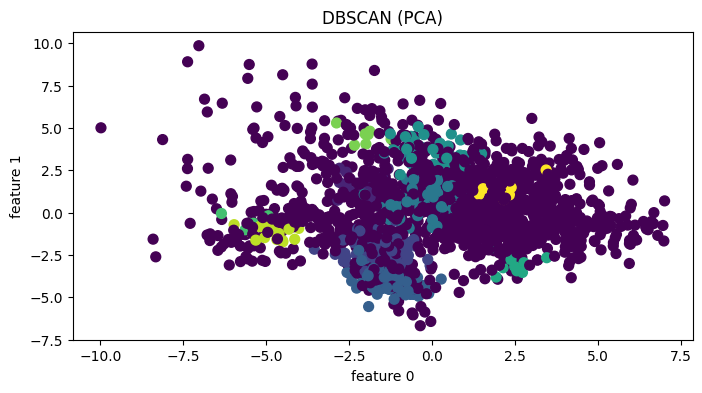

In [ ]:
metric = 'manhattan'

dbscan_metric = DBSCAN(eps=15, min_samples=8, metric=metric)
labels_metric = dbscan_metric.fit_predict(X_digits)
unique_clusters = len(set(labels_metric)) - (1 if -1 in labels_metric else 0)
print(f"Metric: {metric}, Number of clusters: {unique_clusters}, Noise points: {list(labels_metric).count(-1)}")
plot_clusters(digits_pca, 0, 1, labels_metric, "DBSCAN (PCA)")

### cosine

Metric: cosine, Number of clusters: 10, Noise points: 596


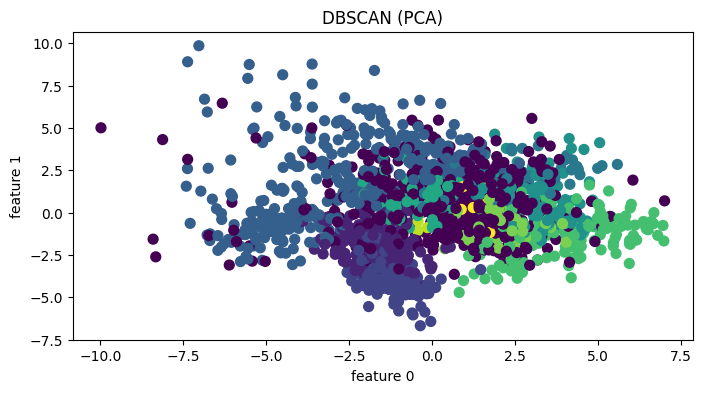

In [ ]:
metric =  'cosine'


dbscan_metric = DBSCAN(eps=0.2, min_samples=6, metric=metric)
labels_metric = dbscan_metric.fit_predict(X_digits)
unique_clusters = len(set(labels_metric)) - (1 if -1 in labels_metric else 0)
print(f"Metric: {metric}, Number of clusters: {unique_clusters}, Noise points: {list(labels_metric).count(-1)}")
plot_clusters(digits_pca, 0, 1, labels_metric, "DBSCAN (PCA)")

### chebyshev

Metric: chebyshev, Number of clusters: 10, Noise points: 854


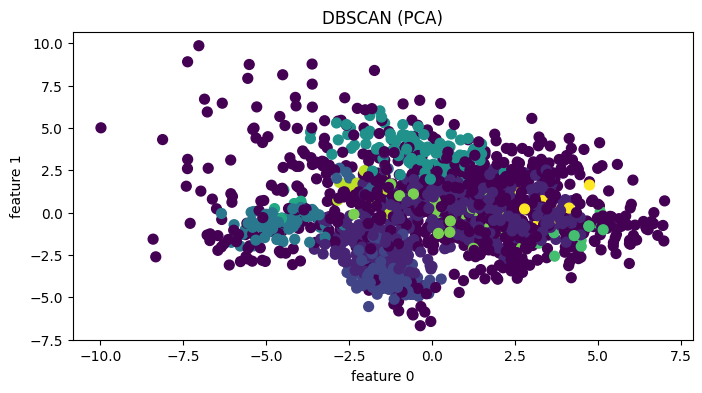

In [ ]:
metric = 'chebyshev'

dbscan_metric = DBSCAN(eps=1.7, min_samples=8, metric=metric)
labels_metric = dbscan_metric.fit_predict(X_digits)
unique_clusters = len(set(labels_metric)) - (1 if -1 in labels_metric else 0)
print(f"Metric: {metric}, Number of clusters: {unique_clusters}, Noise points: {list(labels_metric).count(-1)}")
plot_clusters(digits_pca, 0, 1, labels_metric, "DBSCAN (PCA)")